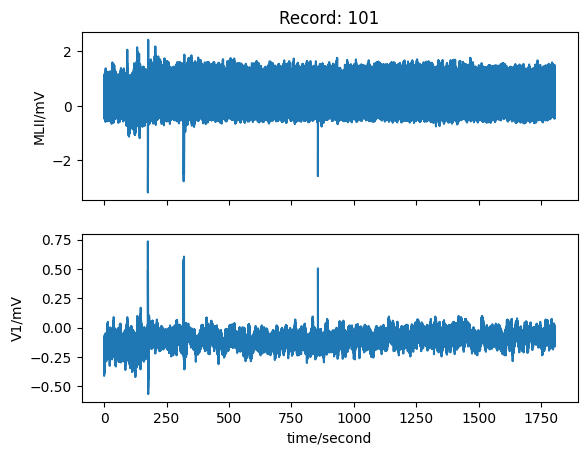

In [11]:
# import the WFDB package
import wfdb

# load a record using the 'rdrecord' function
record = wfdb.rdrecord('../data_v2/101')

# plot the record to screen
wfdb.plot_wfdb(record=record)

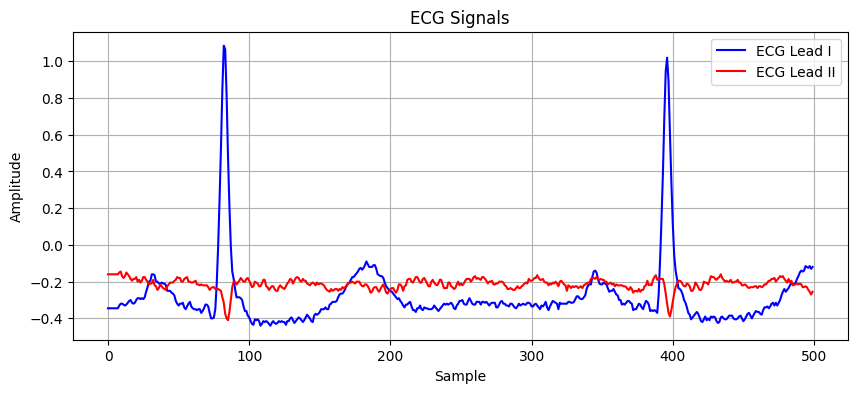

In [12]:
import wfdb
import matplotlib.pyplot as plt
import os 
# Specify the record name
record_name = '../data_v2/101'

# Load the record
record = wfdb.rdrecord(record_name)

# Plot ECG signals
plt.figure(figsize=(10, 4))
plt.plot(record.p_signal[:500, 0], color='b', label='ECG Lead I')
plt.plot(record.p_signal[:500, 1], color='r', label='ECG Lead II')
plt.title('ECG Signals')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


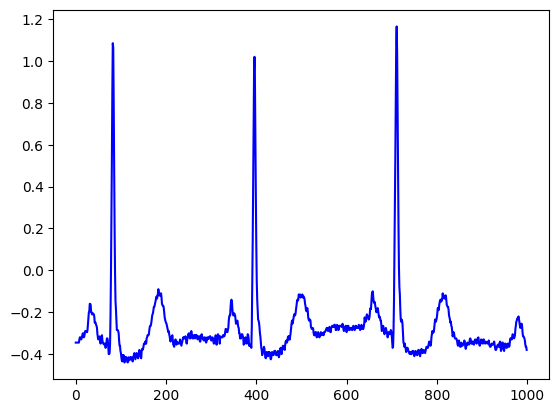

In [33]:
plt.plot(record.p_signal[:1000, 0], color='b', label='ECG Lead I')

In [29]:
import wfdb

# Specify the directory containing the dataset
data_dir = '../data_v2'

# Read the annotation file for the record '101'
annotation = wfdb.rdann(os.path.join(data_dir, '215'), 'atr')

# Print the annotation symbols
print("Annotation symbols:", set(annotation.symbol))

Annotation symbols: {'~', 'A', '"', 'V', 'N', '+', 'F'}


In [30]:
import os
import wfdb

# Path to the directory containing the MIT-BIH Arrhythmia Database files
mit_bih_dir = '../data_v2'

# List all annotation files in the directory
annotation_files = [file for file in os.listdir(mit_bih_dir) if file.endswith('.atr')]

# Initialize a set to store unique annotation symbols (classes)
class_names = set()

# Loop through each annotation file
for annotation_file in annotation_files:
    # Extract record name from the annotation file name
    record_name = os.path.splitext(annotation_file)[0]

    # Read the annotations
    annotation = wfdb.rdann(os.path.join(mit_bih_dir, record_name), 'atr')

    # Get the unique symbols in this record and add them to the set
    class_names.update(set(annotation.symbol))

# Print the unique annotation symbols (classes)
print("Classes in the MIT-BIH Arrhythmia Database:", class_names)


Classes in the MIT-BIH Arrhythmia Database: {'E', '~', 'A', 'e', 'S', 'a', '|', 'V', 'J', 'F', ']', 'j', 'x', 'L', 'Q', '[', 'f', '"', '/', 'N', '+', 'R', '!'}


In [28]:
# !wget "https://raw.githubusercontent.com/HugoGuillen/arff2pandas/master/arff2pandas.py" -O arff2pandas.py
import arff2pandas as a2p
import pandas as pd

with open("../data_v1/ECG5000_TRAIN.arff") as f:
    train = a2p.load(f)
with open("../data_v1/ECG5000_TEST.arff") as f:
    test = a2p.load(f)

df = pd.concat([train, test]).sample(frac=1.0)
df.head()

--2024-04-07 19:39:55--  https://raw.githubusercontent.com/HugoGuillen/arff2pandas/master/arff2pandas.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3043 (3.0K) [text/plain]
Saving to: ‘arff2pandas.py’

arff2pandas.py      100%[===================>]   2.97K  --.-KB/s    in 0s      

2024-04-07 19:39:55 (15.9 MB/s) - ‘arff2pandas.py’ saved [3043/3043]



/Users/harishankarvs/Desktop/miniproj2/notebooks/arff2pandas.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[df_str.columns] = df_str.applymap(lambda x:x.decode('utf-8'))
/Users/harishankarvs/Desktop/miniproj2/notebooks/arff2pandas.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[df_str.columns] = df_str.applymap(lambda x:x.decode('utf-8'))


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att132,att133,att134,att135,att136,att137,att138,att139,att140,target
3639,-0.420849,-1.643832,-2.339013,-2.872088,-3.006814,-3.077426,-2.801954,-2.434903,-1.994947,-1.474873,...,-0.606485,-1.273908,-1.891569,-2.581245,-3.215305,-3.713105,-2.984161,-2.420161,-0.966881,4
638,-1.385012,-2.535237,-2.939583,-3.716171,-3.996335,-3.820581,-2.965084,-1.996793,-1.715014,-1.318321,...,1.136984,1.076767,0.896393,0.663360,0.486238,0.133817,0.239755,0.778598,0.092931,1
321,-0.764141,-1.897479,-2.830009,-3.533201,-4.159813,-4.018316,-3.106878,-1.783882,-1.287700,-0.853368,...,0.731636,0.204764,-0.851483,-1.638906,-2.021305,-1.760584,-1.022869,-1.175138,-2.400957,1
1155,-1.259234,-2.315265,-2.429268,-2.847276,-2.700074,-2.263802,-1.584977,-1.374030,-1.164005,-0.917578,...,1.717133,1.542601,1.298430,1.076172,0.830165,0.751820,0.803126,1.071719,0.685583,1
483,-0.669120,-2.934577,-3.768018,-4.155192,-3.912514,-3.335777,-2.277889,-1.718392,-1.463775,-0.914724,...,1.143759,1.456682,1.609389,1.568455,1.237060,0.979088,1.107234,1.337376,-0.108401,1


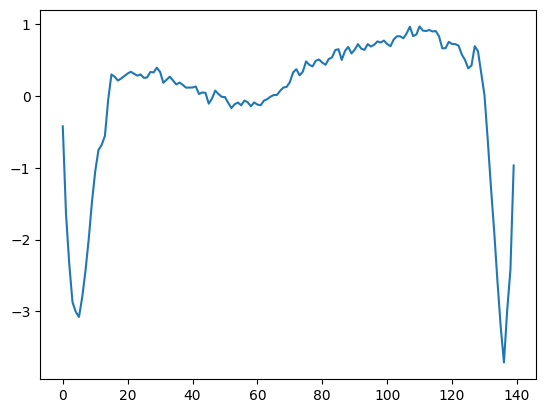

In [31]:
plt.plot(df.iloc[0, :-1].values)